In [1]:
import numpy as np
import importlib
import ex3_functions
from scipy.io import loadmat

In [172]:
importlib.reload(ex3_functions)

<module 'ex3_functions' from '/Users/carioca/Dvlpt/prj/python/PyLearning/ang/Week4/exercise/ex3_functions.py'>

In [3]:
input_layer_size = 400
num_labels = 10

In [4]:
data = loadmat('ex3data1', mat_dtype=True)
X = data['X']
y = data['y']
m = X.shape[0]

In [5]:
rand_indicies = np.random.randint(0, high=m-1, size=(100))
sel = X[rand_indicies]

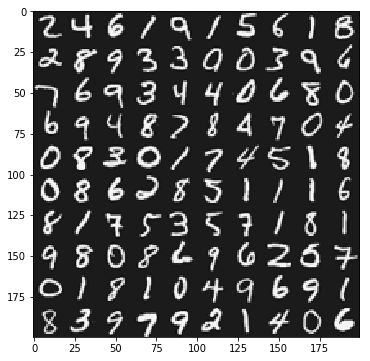

In [6]:
ex3_functions.displayData(np.insert(X,0,1,axis=1), y, indices_to_display=rand_indicies)

In [20]:


#[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

print('Testing lrCostFunction() with regularization')

theta_t = np.array([-2, -1, 1, 2])
X_t = np.insert(np.arange(1,16).reshape(5,3)/10, 0, 1, axis=1)
y_t =(np.array((1,0,1,0,1)) >= .5).reshape(5,1)
lambda_t = 3
J = ex3_functions.lrCostFunction(X_t, y_t, theta_t, lambda_t)
grad = ex3_functions.lrGradientFunction(X_t, y_t, theta_t, lambda_t)

Testing lrCostFunction() with regularization


In [21]:
print('Cost:');
print(J)
print('Expected cost: 2.534819\n');
print('Gradients:');
print(grad);
print('Expected gradients:\n');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');

Cost:
2.59000069442
Expected cost: 2.534819

Gradients:
[[-0.1212565 ]
 [-0.60310931]
 [ 0.58476504]
 [ 1.17263939]]
Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



In [85]:
X_d = np.insert(X, 0, 1, axis=1)
lmbd = .1
y_d = (y==10)

In [173]:
def localCostFoo(theta, y):
#    print(y_d[:5])
    return ex3_functions.lrCostFunction(X_d, y, theta, lmbd)

def localGradFoo(theta, y):
    return ex3_functions.lrGradientFunction(X_d, y, theta, lmbd).flatten()

In [174]:
from scipy import optimize
def oneVsAll(X, y, lmbd, num_labels):
        m = y.size
        n = X.shape[1]
        res_theta = np.zeros(num_labels*n).reshape(num_labels, n)
        for i in range(1, num_labels+1):
#            print('i=%d' %i)
            y_d = (y==i)
            initial_theta = np.zeros(n).reshape(n, 1)
            result = optimize.fmin_cg(localCostFoo, initial_theta, args=(y_d,), fprime=localGradFoo, maxiter=50, full_output=True, gtol=1e-10)
            res_theta[i%10] = result[0]
        return res_theta

In [175]:
theta_rslt = oneVsAll(X_d, y, lmbd, num_labels)

         Current function value: 0.013646
         Iterations: 50
         Function evaluations: 183
         Gradient evaluations: 183
         Current function value: 0.056502
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.061961
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037398
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063870
         Iterations: 50
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.020030
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033644
         Iterations: 50
         Function evaluations: 161
         Gradient evaluations: 161
         Current function value: 0.519344
      

In [176]:
theta_rslt[:,:5]

array([[ -8.92874498e+00,   0.00000000e+00,   0.00000000e+00,
         -1.55140302e-07,  -1.22925948e-05],
       [ -2.97250207e+00,   0.00000000e+00,   0.00000000e+00,
          8.96553742e-05,  -8.28648409e-04],
       [ -3.23678845e+00,   0.00000000e+00,   0.00000000e+00,
         -3.47792739e-05,   4.63024629e-04],
       [ -4.88471986e+00,   0.00000000e+00,   0.00000000e+00,
         -1.23845575e-05,  -3.14611730e-04],
       [ -2.28660645e+00,   0.00000000e+00,   0.00000000e+00,
         -4.88929501e-06,  -1.26579800e-05],
       [  3.82926339e-01,   0.00000000e+00,   0.00000000e+00,
         -6.34099484e-07,   5.11615857e-05],
       [ -4.16465340e+00,   0.00000000e+00,   0.00000000e+00,
         -1.25665920e-06,   2.27378327e-05],
       [ -2.17639855e+00,   0.00000000e+00,   0.00000000e+00,
         -2.97647548e-05,   2.13333749e-04],
       [ -2.40941524e-01,   0.00000000e+00,   0.00000000e+00,
         -4.66541209e-08,   5.66756168e-07],
       [ -4.77586653e+00,   0.0000000

In [177]:
h_d = ex3_functions.predict(X_d, theta_rslt[1], 10)
h_d[500:1000].sum()

4920

In [180]:
def predictOneVsAll(X_p, thetas):
    m = X.shape[0]
    for i in thetas.shape[0]:
        tht = theta.reshape(theta.size, 1)
    

array([[  9.99983093e-01],
       [  8.10921140e-01],
       [  9.99999946e-01],
       [  9.99990753e-01],
       [  9.99973819e-01],
       [  1.59117555e-06],
       [  2.15344672e-19],
       [  5.92978265e-14],
       [  2.74525648e-14],
       [  3.94634971e-07]])